## Problem 1 (Overfitting)

In [174]:
import math
import numpy as np
import matplotlib.pyplot as plt

### (a)

In [205]:
# size = 30 test
np.random.seed(777)
t = np.linspace(0 , 1, num=30)
x_sequence = np.linspace(0 , 1, num=500)
g = np.sin(2*math.pi*t)**2 + np.random.normal(loc=0, scale=math.sqrt(0.07), size=30)
g_n = np.array([np.sin(2*math.pi*t)**2 + 1/(math.sqrt(2*math.pi) * math.sqrt(0.07)) * math.exp(-1/2 * (t/math.sqrt(0.07))**2) for t in t])

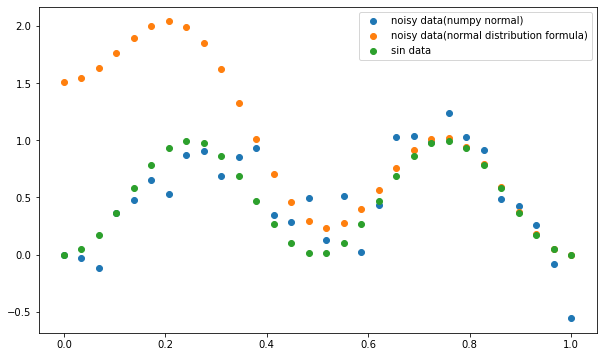

In [204]:
plt.figure(figsize=(10,6))
plt.scatter(t, g, label="noisy data(numpy normal)")
plt.scatter(t, g_n, label="noisy data(normal distribution formula)")
plt.scatter(t, np.sin(2*math.pi*t)**2, label="sin data")
plt.legend()
plt.show()

這邊有對numpy.random.normal函式與normal distribution 公式做比較，利用公式算出的值似乎並沒有真正的加入雜訊，而是將左方區域做不同程度的平移，利用numpy.random.normal的結果較為符合預期， 因此後續結果皆以其作為資料來源。

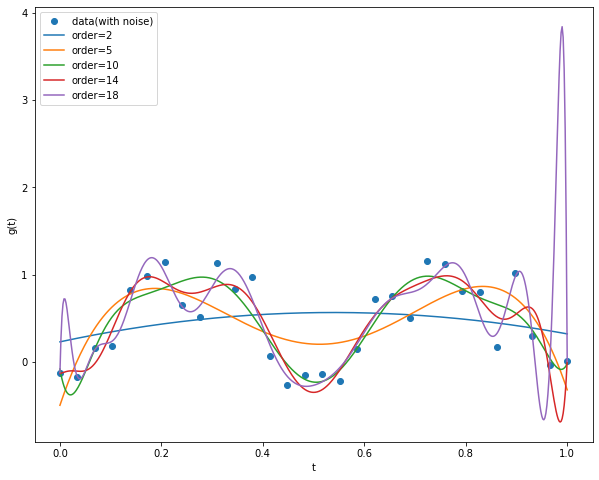

In [176]:
plt.figure(figsize=(10,8))
plt.scatter(t, g, label="data(with noise)")
# plt.scatter(t, np.sin(2*math.pi*t)**2, label="data(without noise)")

equ2 = np.polyfit(t, g, deg=2)
y2 = np.polyval(equ2, x_sequence)
plt.plot(x_sequence, y2, c="tab:blue", label="order=2")

equ5 = np.polyfit(t, g, deg=5)
y5= np.polyval(equ5, x_sequence)
plt.plot(x_sequence, y5, c="tab:orange", label="order=5")

equ10 = np.polyfit(t, g, deg=10)
y10= np.polyval(equ10, x_sequence)
plt.plot(x_sequence, y10, c="tab:green", label="order=10")

equ14 = np.polyfit(t, g, deg=14)
y14= np.polyval(equ14, x_sequence)
plt.plot(x_sequence, y14, c="tab:red", label="order=14")

equ18 = np.polyfit(t, g, deg=18)
y18= np.polyval(equ18, x_sequence)
plt.plot(x_sequence, y18, c="tab:purple", label="order=18")

plt.xlabel("t")
plt.ylabel("g(t)")
plt.legend(loc=2)
plt.show()

可以發現越高階數越能貼近原始資料的分布，然而過於高階的曲線容易造成過於激進的調整，以為了符合原始資料趨勢，如最右方紫色曲線

### (b)

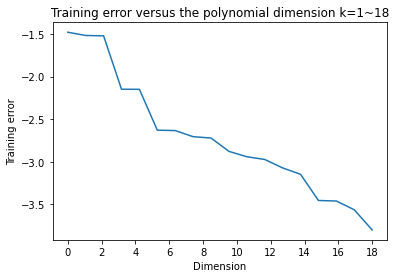

In [177]:
plt.figure()
mse_train = np.zeros(18)
for i in range(18):
    equ = np.polyfit(t, g, i+1)
    y = np.polyval(equ, t)
    mse_train[i] = math.log(np.sum((g-y)**2) / len(t))
# print(mse_train)

plt.plot(np.linspace(0,18,num=18) ,mse_train)
plt.xlabel('Dimension') ; plt.ylabel('Training error')
plt.title('Training error versus the polynomial dimension k=1~18')
plt.xticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18])
plt.show()

### (c)

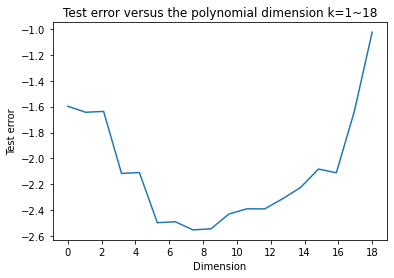

In [185]:
np.random.seed(777)
t_test = np.linspace(0 , 1, num=1000)
g_test = np.sin(2*math.pi*t_test)**2 + np.random.normal(loc=0, scale=math.sqrt(0.07), size=1000)

plt.figure()
mse_test = np.zeros(18)
for i in range(18):
    equ = np.polyfit(t, g, i+1)
    y_test = np.polyval(equ, t_test)
    mse_test[i] = math.log(np.sum((g_test-y_test)**2) / len(t_test))
# print(mse_test)

plt.plot(np.linspace(0,18,num=18) ,mse_test)
plt.xlabel('Dimension') ; plt.ylabel('Test error')
plt.title('Test error versus the polynomial dimension k=1~18')
plt.xticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18])
plt.show()

### (d)

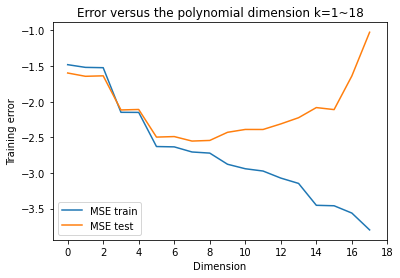

In [179]:
plt.figure()
plt.plot(mse_train, label="MSE train")
plt.plot(mse_test, label="MSE test")

plt.legend(loc=3)
plt.xlabel('Dimension') ; plt.ylabel('Training error')
plt.title('Error versus the polynomial dimension k=1~18')
plt.xticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18])
plt.show()

## Problem 2 (AIC and BIC)

In [180]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [181]:
x = np.array([0.2, 0.3, 0.6, 0.9, 1.1, 1.3, 1.4, 1.6])
y = np.array([0.050446, 0.098426, 0.33277, 0.7266, 1.0972, 1.5697, 1.8487, 2.5015])
x_label = np.linspace(0.2, 1.6, num=100)
n = len(x)

# degree = 1
equ_1 = np.polyfit(x, y, deg=1)
fit_y1 = np.polyval(equ_1, x)
rss1 = np.sum((fit_y1 - y) ** 2)
aic1 = n * math.log(rss1 / n) + 2 * 1
bic1 = n * math.log(rss1 / n) + math.log(n) * 1

# degree = 2
equ_2 = np.polyfit(x, y, deg=2)
fit_y2 = np.polyval(equ_2, x)
rss2 = np.sum((fit_y2 - y) ** 2)
aic2 = n * math.log(rss2 / n) + 2 * 2
bic2 = n * math.log(rss2 / n) + math.log(n) * 1

# degree = 3
equ_3 = np.polyfit(x, y, deg=3)
fit_y3 = np.polyval(equ_3, x)
rss3 = np.sum((fit_y3 - y) ** 2)
aic3 = n * math.log(rss3 / n) + 2 * 3
bic3 = n * math.log(rss3 / n) + math.log(n) * 1

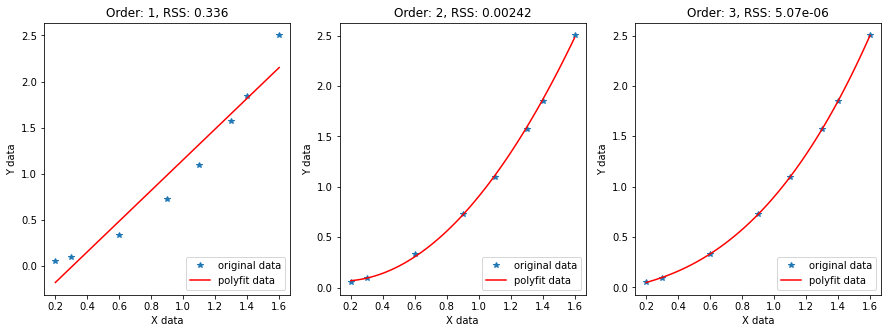

In [182]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.plot(x, y, '*', label='original data')
plt.plot(x_label, np.polyval(equ_1,x_label), 'r', label='polyfit data')
plt.xlabel('X data')
plt.ylabel('Y data')
plt.legend(loc=4)
plt.title(f'Order: 1, RSS: {rss1:.3}')

plt.subplot(1,3,2)
plt.plot(x, y, '*', label='original data')
plt.plot(x_label, np.polyval(equ_2,x_label), 'r', label='polyfit data')
plt.xlabel('X data')
plt.ylabel('Y data')
plt.legend(loc=4)
plt.title(f'Order: 2, RSS: {rss2:.3}')

plt.subplot(1,3,3)
plt.plot(x, y, '*', label='original data')
plt.plot(x_label, np.polyval(equ_3,x_label), 'r', label='polyfit data')
plt.xlabel('X data')
plt.ylabel('Y data')
plt.legend(loc=4)
plt.title(f'Order: 3, RSS: {rss3:.3}')

plt.show()

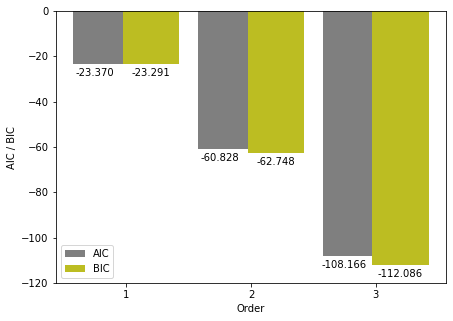

In [183]:
x_aic = [0,1,2]
x_bic = [0.4,1.4,2.4]
aic = [aic1, aic2, aic3]
bic = [bic1, bic2, bic3]

plt.figure(figsize=(7,5))

plt.bar([0,1,2], [aic1,aic2,aic3], width=0.45, color='tab:gray', label='AIC')
plt.bar([0.4,1.4,2.4], [bic1,bic2,bic3], width=0.45, color='tab:olive', label='BIC')
plt.xlabel("Order")
plt.ylabel("AIC / BIC")
plt.ylim(-120)
plt.legend(loc=3)
plt.xticks([0.2,1.2,2.2],['1', '2', '3'])
for a, b in zip(x_aic, aic):
    plt.text(a-0.05, b-6, f"{b:.3f}", ha='center', va= 'bottom',fontsize=10)

for a, b in zip(x_bic, bic):
    plt.text(a, b-6, f"{b:.3f}", ha='center', va= 'bottom',fontsize=10)

plt.show()

AIC / BIC 分析。

無論是AIC或是BIC，該選擇的都是以越小效果表現越好，因此在此條件下應該選擇AIC與BIC數值都最小的order3 (aic= -108.166, bic= -112.086) 來做為這次分類所需的model。